In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_row',None)

In [5]:
import os.path
#from os import path

In [6]:
folderpath = r"C:\Users\satish.al.kumar\Desktop\MachineLearning-10Apr2020\Data\LogisticRegression_Data\AReM"
outfolder = r'C:\Users\satish.al.kumar\Desktop\MachineLearning-10Apr2020\Data\LogisticRegression_Data\consolidatedfile.csv'

folderpath
outfolder

'C:\\Users\\satish.al.kumar\\Desktop\\MachineLearning-10Apr2020\\Data\\LogisticRegression_Data\\consolidatedfile.csv'

In [7]:
# Create new file to store data

if os.path.isfile(outfolder):
    os.remove(outfolder)
    open(outfolder,'w')
else:
    open(outfolder,'w')

In [8]:
from csv import writer
from csv import reader
def add_column_in_csv(input_file, output_file, transform_row):

    with open(input_file, 'r') as read_obj, open(output_file, 'a',newline='') as write_obj:
        
        csv_reader = reader(read_obj)
        
        csv_writer = writer(write_obj)
       
        for row in csv_reader:
           
            transform_row(row, csv_reader.line_num)
            
            csv_writer.writerow(row)

In [9]:
for i in os.scandir(folderpath):

    fpath = i.path

    if os.path.isdir(i.path):
        
        for z in os.scandir(i.path):
        
            if os.path.isfile(z.path) and z.path[-3:].upper()=='CSV':
                
                add_column_in_csv(z.path, outfolder, lambda row, line_num: row.append(os.path.basename(os.path.dirname(z.path))))
                      

In [10]:
f=open(outfolder,'r')
d=f.readlines()
f.close()
ofile = open(outfolder,'w')

for i in d:
    
    if len(i.split(','))!=2 and len(i.split(','))==8:
        ofile.write(i)

ofile.close()   

Removing Unwanted row

In [11]:
df=pd.read_csv(outfolder)

In [12]:
df.drop(df[df['# Columns: time']=='# Columns: time'].index,inplace=True)

In [13]:
df.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23', 'types']

In [14]:
df.to_csv(outfolder,index=False)

In [106]:
df

In [16]:
set(df['types'])

{'bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking'}

In [16]:
from pandas_profiling import ProfileReport

In [107]:
ProfileReport(df)

In [17]:
df.describe()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,types
count,41757,41757,41757,41757,41757,41757,41757,41757
unique,480,352,689,300,487,363,523,7
top,0,45.00,0.00,12.00,0.00,18.00,0.00,lying
freq,87,2969,10298,1886,8233,1146,4884,7200


In [19]:
df.value_counts()

time    avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  types   
71250   27.00      0.00       2.67       0.47       5.00       0.71       lying       3
109500  28.75      0.43       12.00      0.00       9.33       0.47       lying       3
3500    29.00      0.00       8.50       0.50       8.75       0.43       lying       3
82000   27.00      0.00       2.00       0.00       3.50       2.50       lying       3
96250   29.75      0.43       4.00       0.00       4.50       0.50       lying       3
                                                                                     ..
29000   36.25      4.55       13.67      1.25       12.00      4.55       walking     1
        36.50      0.50       12.75      0.83       26.00      1.22       bending2    1
                   2.87       15.00      6.96       15.00      6.52       cycling     1
        36.67      0.47       3.00       0.00       18.33      0.47       sitting     1
45750   27.00      0.00       15.00  

In [18]:
#Type casting
df[['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23','var_rss23']]=df[['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23','var_rss23']].astype(float)

In [19]:
df[df['var_rss12']==0]['var_rss12'].count()

10298

In [20]:
#Replace zero value with the mean value

for i in df.columns:
    if df.dtypes[i]=='float':
        if df[df[i]==0][i].count()>0 and i!='time':
            df[i] = df[i].replace(0,df[i].mean())
        

In [21]:
df[df['var_rss12']==0]['var_rss12'].count()

0

In [22]:
x=df.drop(columns=['time','types'])
y=df.types

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
sc = StandardScaler()
arr = sc.fit_transform(x)

In [108]:
arr

In [26]:
import seaborn as sns

<AxesSubplot:>

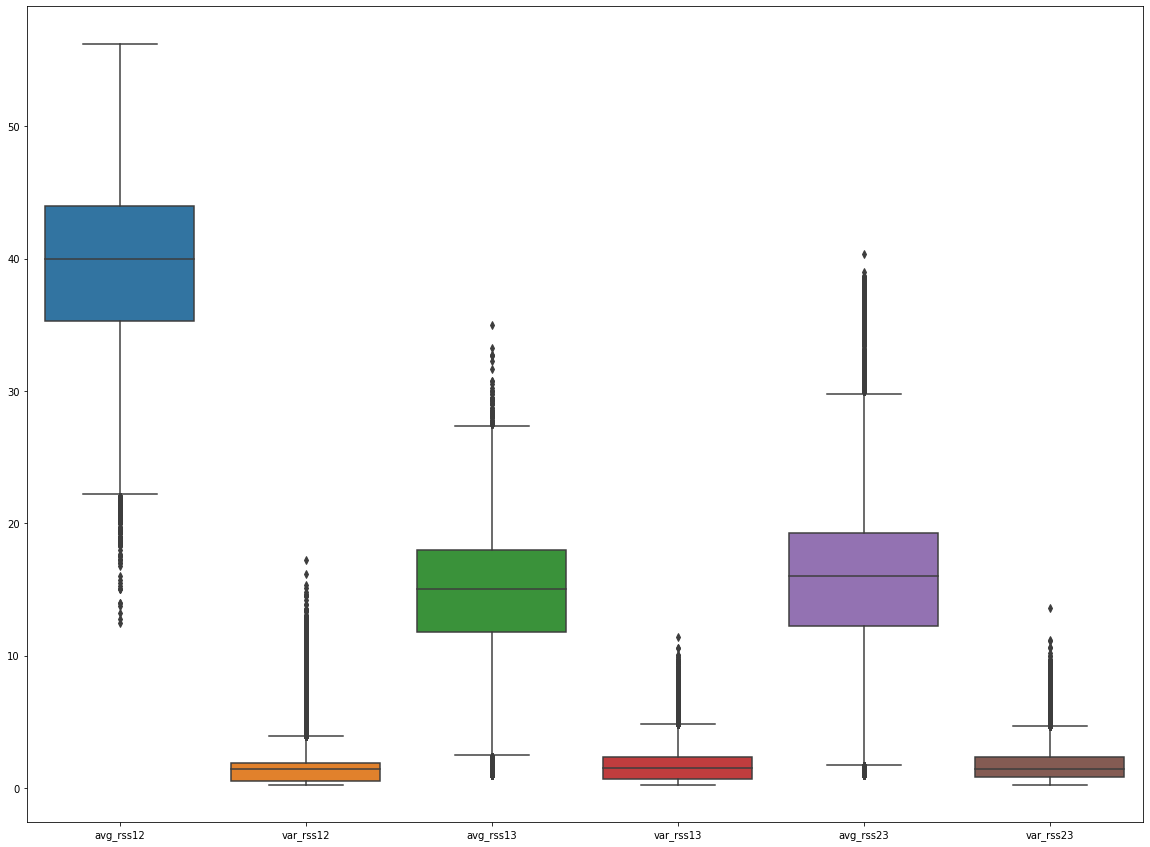

In [27]:
fg,ax=plt.subplots(figsize=(20,15))
sns.boxplot(data = x,ax=ax)

In [28]:
q=np.quantile(df['avg_rss12'],0.002)
df1 = df[df['avg_rss12']>q]

In [29]:
q=df1['avg_rss23'].quantile(0.98)

df1=df1[df1['avg_rss23']<q]

In [30]:
q=df1['var_rss12'].quantile(0.9)

df1=df1[df1['var_rss12']<q]

In [31]:
q=df1['var_rss13'].quantile(0.9)

df1=df1[df1['var_rss13']<q]

In [32]:
q=df1['var_rss23'].quantile(0.9)

df1=df1[df1['var_rss23']<q]

<AxesSubplot:>

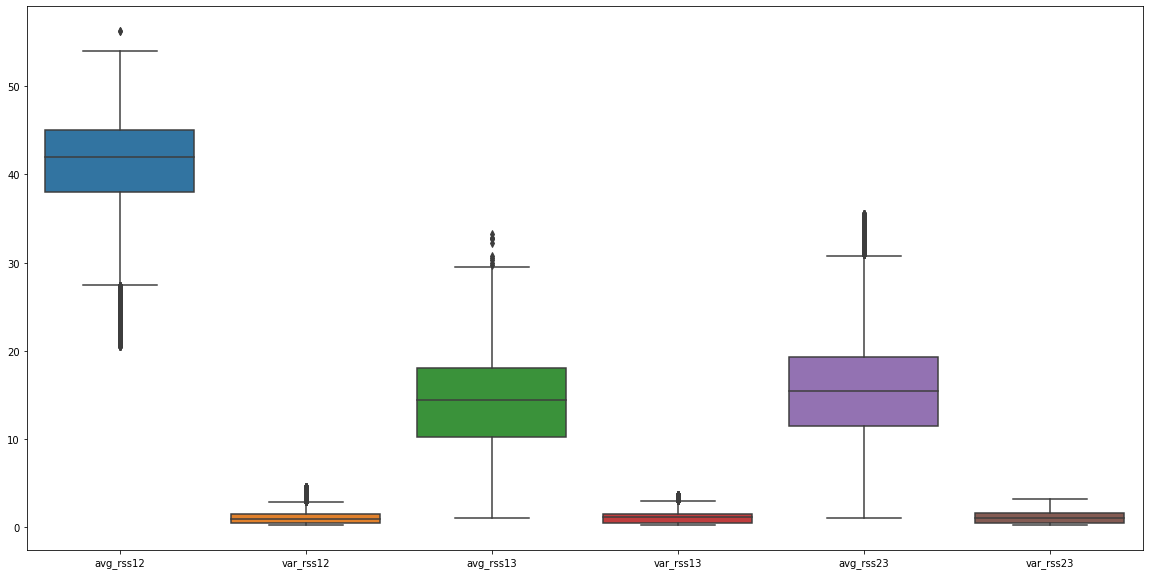

In [33]:
fg,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data = df1.drop(columns=['time']),ax=ax)

# Out Lair Handling

### I am getting error wile runing this

def outliars(data):
    def outliar_limit(c):
        print(c)
        Q3 = np.percentile(c,75)
        Q1 = np.percentile(c,25)
        print(c)
        IQR = Q3-Q1
        UL = Q3 + 1.5*IQR
        LL = Q1 - 1.5*IQR
        
        return UL,LL
        
    for i in data.columns:
        #print(data[i].dtype)
        if data[i].dtype=='float64' and i!='time':
            UL,LL = outliar_limit(i)
            data[i] = np.where((data[i]<UL) | (data[i]>LL) , np.nan,data)
    return data

df2 = outliars(df1)

In [43]:
x=df1.drop(columns=['time','types'])

In [44]:
y=df1.types

In [45]:
#Converting all categorical value in numerical value
z=0
for i in set(y):
    y.replace({i:z},inplace=True)
    z+=1

In [85]:
arr=sc.fit_transform(x)

# VIF

In [82]:
def vif_score(x):
    sc = StandardScaler()
    arr = sc.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns=['Feature','VIF'])

In [109]:
# There no feature which has vif more that 10, so no coloniyarity

vif_score(df1.drop(columns=['time','types']))

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(arr,y,test_size=.3,random_state = 20)

In [58]:
from sklearn.linear_model import LogisticRegression

C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs

In [65]:
lr_nwn = LogisticRegression(verbose=1,n_jobs=4,solver='newton-cg')

In [66]:
lr_nwn.fit(x_train,y_train)

C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed:    2.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=4, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [75]:
y_prdt = lr_nwn.predict(x_test)

In [69]:
lr_nwn.score(x_train,y_train)

0.6179386007121548

In [70]:
lr_nwn.score(x_test,y_test)

0.6124396542045583

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [80]:
confusion_matrix(y_test,y_prdt)

array([[1915,    1,   82,    0,   42,  179,    3],
       [  17,  415,  146,    7,   13,   32,  103],
       [ 417,   39,  603,   70,  142,  801,    2],
       [   1,    5,  126,  566,    0,   42,    0],
       [  85,   14,   59,   59,  418,   10,    2],
       [ 275,   24,  382,    3,    1, 1384,    2],
       [  10,  193,   40,    0,   18,    5,  154]], dtype=int64)

In [103]:
def lr_slover(slvr):
    lr = LogisticRegression(verbose=1,n_jobs=4,solver=slvr)
    lr.fit(x_train,y_train)
    y_predict = lr.predict(x_test)
    score1 = lr.score(x_train,y_train)
    score2 = lr.score(x_test,y_test)
    ConMtrc = confusion_matrix(y_test,y_predict)
    print('Score of train value: {}\nScore of Test value : {}\nConfutionmation Matrix :\n {}'.format(score1,score2,ConMtrc))
    

In [104]:
lr_slover('newton-cg')

C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Score of train value: 0.6179386007121548
Score of Test value : 0.6124396542045583
Confutionmation Matrix :
 [[1915    1   82    0   42  179    3]
 [  17  415  146    7   13   32  103]
 [ 417   39  603   70  142  801    2]
 [   1    5  126  566    0   42    0]
 [  85   14   59   59  418   10    2]
 [ 275   24  382    3    1 1384    2]
 [  10  193   40    0   18    5  154]]


[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed:    0.2s finished


In [105]:
lr_slover('liblinear')

C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\satish.al.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]Score of train value: 0.6178423635838707
Score of Test value : 0.6128887391938924
Confutionmation Matrix :
 [[1915    1   82    0   42  179    3]
 [  17  418  144    7   13   32  102]
 [ 417   39  602   70  142  802    2]
 [   1    5  125  567    0   42    0]
 [  85   14   59   59  418   10    2]
 [ 275   24  381    3    1 1385    2]
 [  10  193   40    0   18    5  154]]


# i am confused with calcultion of Accurecy, Recall etc calculation